In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PATH = "../data/raw"

In [3]:
df = pd.read_csv(f"{PATH}/heart.csv")

# EDA

## Common characteristics

In [4]:
print(f"The table contains {df.shape[0]} entries grouped into {df.shape[1]} columns")

The table contains 303 entries grouped into 14 columns


There are following columns in the given dataset:\n{

In [5]:
print(list(df.columns))

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


For further use let's rename the columns according to the description given at the "Kaggle" source

In [6]:
columns = [
    "age",
    "sex",
    "chest_pain_type",
    "resting_blood_pressure",
    "serum_cholestoral",
    "fasting_blood_sugar",
    "resting_electrocardiographic_results",
    "maximum_heart_rate",
    "induced_angina",
    "induced_st_depression",
    "st_peak_slope",
    "number_of_major_vessels",
    "thal",
    "target"
]

In [7]:
df.columns = columns

The entries in our dataframe look like

In [8]:
df.sample(1).T

,181
age,65.0
sex,0.0
chest_pain_type,0.0
resting_blood_pressure,150.0
serum_cholestoral,225.0
fasting_blood_sugar,0.0
resting_electrocardiographic_results,0.0
maximum_heart_rate,114.0
induced_angina,0.0
induced_st_depression,1.0


## Distribution and correlation

Let's gather some information about the dataset values distribution

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   303 non-null    int64  
 1   sex                                   303 non-null    int64  
 2   chest_pain_type                       303 non-null    int64  
 3   resting_blood_pressure                303 non-null    int64  
 4   serum_cholestoral                     303 non-null    int64  
 5   fasting_blood_sugar                   303 non-null    int64  
 6   resting_electrocardiographic_results  303 non-null    int64  
 7   maximum_heart_rate                    303 non-null    int64  
 8   induced_angina                        303 non-null    int64  
 9   induced_st_depression                 303 non-null    float64
 10  st_peak_slope                         303 non-null    int64  
 11  number_of_major_ves

In [10]:
df.nunique()

age                                      41
sex                                       2
chest_pain_type                           4
resting_blood_pressure                   49
serum_cholestoral                       152
fasting_blood_sugar                       2
resting_electrocardiographic_results      3
maximum_heart_rate                       91
induced_angina                            2
induced_st_depression                    40
st_peak_slope                             3
number_of_major_vessels                   5
thal                                      4
target                                    2
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
chest_pain_type,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
resting_blood_pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
serum_cholestoral,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
resting_electrocardiographic_results,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
maximum_heart_rate,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
induced_angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
induced_st_depression,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Now we separate numerical and categircal features. As some threshold that makes us think of a feature as of a certain type let's take the value of 10.

In [12]:
threshold = 5
cat_features = df.columns[df.nunique() <= threshold][:-1].tolist()
num_features = list(df.columns[df.nunique() > threshold])

In [13]:
cat_features, num_features

(['sex',
  'chest_pain_type',
  'fasting_blood_sugar',
  'resting_electrocardiographic_results',
  'induced_angina',
  'st_peak_slope',
  'number_of_major_vessels',
  'thal'],
 ['age',
  'resting_blood_pressure',
  'serum_cholestoral',
  'maximum_heart_rate',
  'induced_st_depression'])

In [14]:
df.corr()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate,induced_angina,induced_st_depression,st_peak_slope,number_of_major_vessels,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain_type,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
resting_blood_pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
serum_cholestoral,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
resting_electrocardiographic_results,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
maximum_heart_rate,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
induced_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
induced_st_depression,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


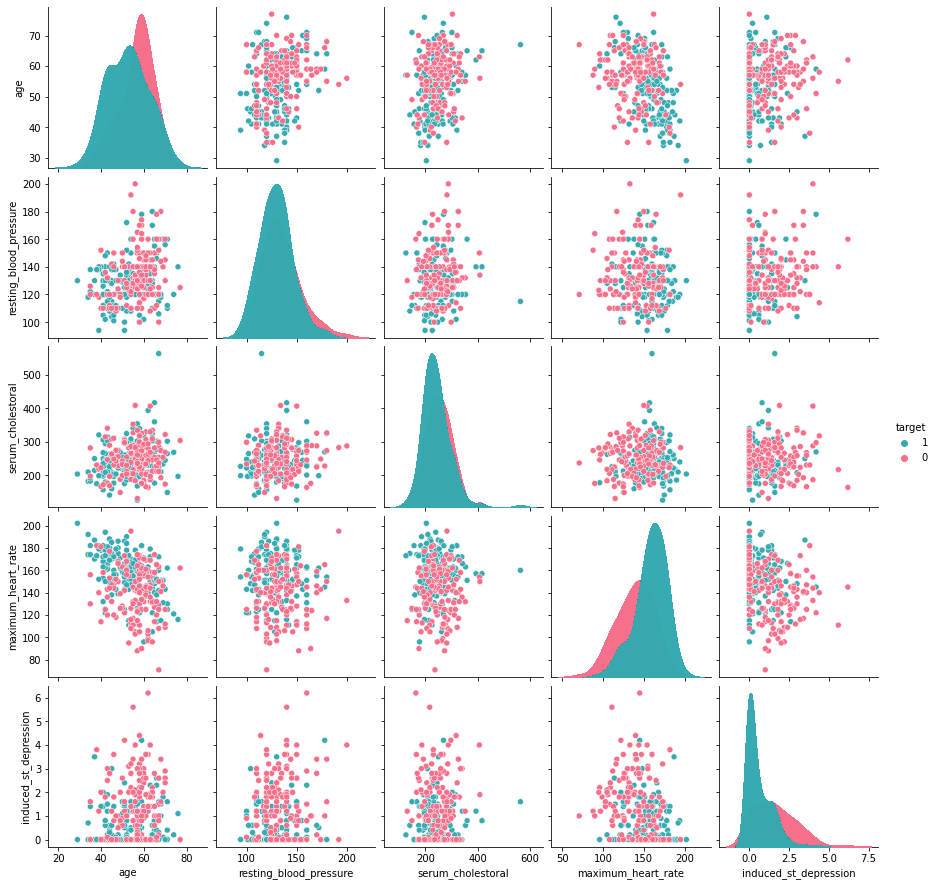

In [15]:
g = sns.pairplot(df[num_features + ["target"]],
                 hue="target",
                 hue_order=df.target,
                 palette="husl")
g.savefig("pairplot.png")